In [1]:
using Distributions
using Turing
using Stan

# Load data; loaded data is a list of dict named `ldastandata`
include(Pkg.dir("Turing")*"/example-models/stan-models/lda-stan.data.jl")
topicdata = ldastandata[1]

# Load model
include(Pkg.dir("Turing")*"/example-models/stan-models/lda.model.jl")
#= NOTE: loaded model is defined as below
@model ldamodel(K, V, M, N, w, doc, beta, alpha) = begin
  theta = Vector{Vector{Real}}(M)
  for m = 1:M
    theta[m] ~ Dirichlet(alpha)
  end

  phi = Vector{Vector{Real}}(K)
  for k = 1:K
    phi[k] ~ Dirichlet(beta)
  end

  phi_dot_theta = [log([dot(map(p -> p[i], phi), theta[m]) for i = 1:V]) for m=1:M]
  for n = 1:N
    Turing.acclogp!(vi, phi_dot_theta[doc[n]][w[n]])
  end
end
=#

Environment variable JULIA_SVG_BROWSER not found.


ldamodel (generic function with 9 methods)

In [2]:
setchunksize(100)    # increase AD chunk-size to 100

[Turing]: AD chunk size is set as 100


100

In [3]:
samples = sample(ldamodel(data=topicdata), NUTS(1000, 0.65))

[Turing]:  Assume - `theta` is a parameter
  in @~(::Any, ::Any) at compiler.jl:49
[Turing]:  Assume - `phi` is a parameter
  in @~(::Any, ::Any) at compiler.jl:49
[Turing] looking for good initial eps...
[Turing.NUTS] found initial ϵ: 0.5
[Turing.WARNING]: Numerical error has been found in gradients.
  in verifygrad(::Array{Float64,1}) at ad.jl:100
[Turing]:  Adapted ϵ = 0.3338914487827909, 200 HMC iterations is used for adaption.
  in adapt_step_size(::Turing.Sampler{Turing.NUTS}, ::Float64, ::Float64) at adapt.jl:17
[Turing.WARNING]: Numerical error has been found in gradients.
  in verifygrad(::Array{Float64,1}) at ad.jl:100
[Turing.WARNING]: Numerical error has been found in gradients.
  in verifygrad(::Array{Float64,1}) at ad.jl:100
[Turing.WARNING]: Numerical error has been found in gradients.
  in verifygrad(::Array{Float64,1}) at ad.jl:100
[Turing.WARNING]: Numerical error has been found in gradients.
  in verifygrad(::Array{Float64,1}) at ad.jl:100
[Turing.WARNING]: Numerical

[NUTS] Sampling...100% Time: 0:03:25


Object of type "Turing.Chain"

Iterations = 1:1000
Thinning interval = 1
Chains = 1
Samples per chain = 1000

[0.163269 0.836731 … 0.173375 0.826625; 0.163269 0.836731 … 0.173375 0.826625; … ; 0.192437 0.807563 … 0.922382 0.0776176; 0.192437 0.807563 … 0.922382 0.0776176]

In [4]:
# Load visualization script for topic models; visualization function is called `vis_topic_res`
include(Pkg.dir("Turing")*"/example-models/stan-models/topic_model_vis_helper.jl")

@doc vis_topic_res  # show the usage of the visualization function

Function for visualization topic models.

Usage:

```
vis_topic_res(samples, K, V, avg_range)
```

  * `samples` is the chain return by `sample()`
  * `K` is the number of topics
  * `V` is the size of vocabulary
  * `avg_range` is the end point of the running average


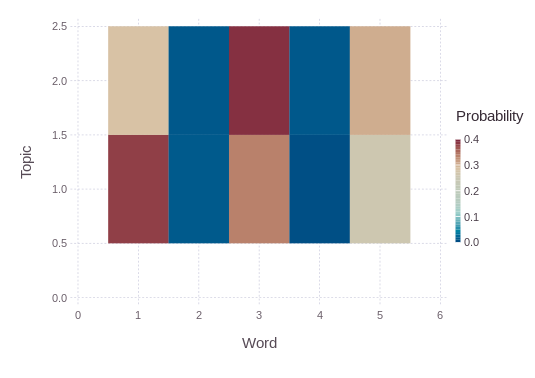

In [5]:
vis_topic_res(samples, topicdata["K"], topicdata["V"], 1000)

In [6]:
# Load data; loaded data is a list of dict named `nbstandata`
include(Pkg.dir("Turing")*"/example-models/stan-models/MoC-stan.data.jl")
topicdata2 = nbstandata[1]

# Load model
include(Pkg.dir("Turing")*"/example-models/stan-models/MoC.model.jl")
#= NOTE: loaded model is defined as below
@model nbmodel(K, V, M, N, z, w, doc, alpha, beta) = begin
  theta ~ Dirichlet(alpha)

  phi = Array{Any}(K)
  for k = 1:K
    phi[k] ~ Dirichlet(beta)
  end

  log_theta = log(theta)
  Turing.acclogp!(vi, sum(log_theta[z[1:M]]))

  log_phi = map(x->log(x), phi)
  for n = 1:N
    Turing.acclogp!(vi, log_phi[z[doc[n]]][w[n]])
  end

  phi
end

=#

nbmodel (generic function with 10 methods)

In [7]:
samples2 = sample(nbmodel(data=topicdata2), NUTS(1000, 0.65))

[Turing]:  Assume - `theta` is a parameter
  in @~(::Any, ::Any) at compiler.jl:49
[Turing]:  Assume - `phi` is a parameter
  in @~(::Any, ::Any) at compiler.jl:49
[Turing] looking for good initial eps...
[Turing.WARNING]: Numerical error has been found in gradients.
  in verifygrad(::Array{Float64,1}) at ad.jl:100
[Turing.WARNING]: Numerical error has been found in gradients.
  in verifygrad(::Array{Float64,1}) at ad.jl:100
[Turing.NUTS] found initial ϵ: 0.25
[Turing.WARNING]: Numerical error has been found in gradients.
  in verifygrad(::Array{Float64,1}) at ad.jl:100
[Turing]:  Adapted ϵ = 0.14342147248586115, 200 HMC iterations is used for adaption.
  in adapt_step_size(::Turing.Sampler{Turing.NUTS}, ::Float64, ::Float64) at adapt.jl:17
[NUTS] Finished with
  Running time        = 351.79663569199965;
  #lf / sample        = 26.958;
  #evals / sample     = 26.96;
  pre-cond. diag mat  = [1.61067,1.41474,1.80153,296.81,6.04135,11.9786,6.44429,1.0,16.0085,3.25305,9.29968,2.12112,2.124

[NUTS] Sampling...100% Time: 0:05:52


Object of type "Turing.Chain"

Iterations = 1:1000
Thinning interval = 1
Chains = 1
Samples per chain = 1000

[2.888e-5 0.000444987 … 0.0161975 0.0232756; 2.888e-5 0.000444987 … 0.0161975 0.0232756; … ; 0.0199369 0.205769 … 0.161707 0.0249676; 0.0199369 0.205769 … 0.161707 0.0249676]

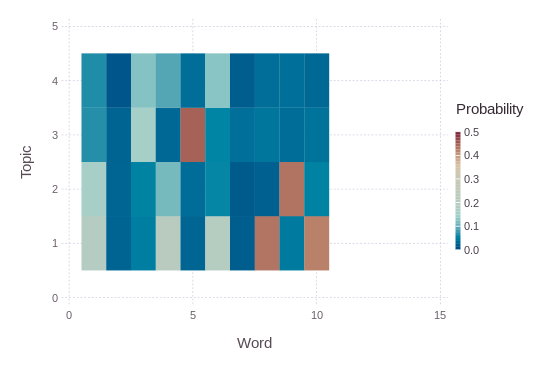

In [8]:
vis_topic_res(samples2, topicdata2["K"], topicdata2["V"], 1000)